In [36]:
import json
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
from pathlib import Path
from typing import NamedTuple

In [61]:
base_path = Path("/home/makait/projects/ghostwriter/ghostwriter/benchmarking/data/2022-12-19/140421")

In [44]:
class LogEntry(NamedTuple):
    mbps: float
    tps: int

In [45]:
def parse_logs(path):
    with path.open() as f:
        for line in f:
            match = re.search(r"\[MON\] S000 (?P<mbps>\d+\.\d*) MB/s \((?P<tps>\d+) tuples/sec\)", line)
            if match:
                yield LogEntry(mbps=float(match["mbps"]), tps=int(match["tps"]))
            
    
    

In [51]:
def read_experiment(path: Path) -> pd.DataFrame:
    with (path/"metadata.json").open() as f:
        metadata = json.load(f)
    entries = list(parse_logs(path / "gw_consumer.log"))[:-1]
    df = pd.DataFrame.from_records(entries, columns=["mbps", "tps"])
    df["batch_size"] = metadata["batch_size"]
    df["interleaved"] = metadata["interleaved"]
    return df

In [47]:
def read_logs(path: Path):
    dfs = []
    for path in path.iterdir():
        assert path.is_dir()
        dfs.append(read_experiment(path))
    return pd.concat(dfs)
        

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [68]:
isolated = read_logs(Path("/home/makait/projects/ghostwriter/ghostwriter/benchmarking/data/2022-12-19/140421"))

In [67]:
interleaved = read_logs(Path("/home/makait/projects/ghostwriter/ghostwriter/benchmarking/data/2022-12-19/152003"))

## Isolated YSB Throughput

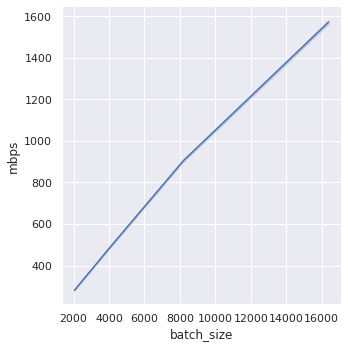

In [70]:
sns.relplot(
    data=isolated[isolated["batch_size"] <= 32000], kind="line",
    x="batch_size", y="mbps", errorbar="sd"
)

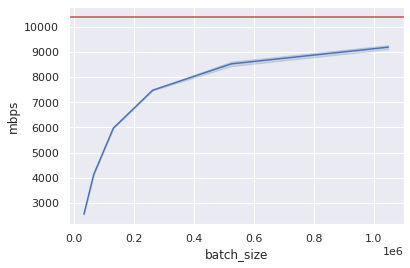

In [85]:
graph = sns.lineplot(
    data=isolated[isolated["batch_size"] >= 32000], #kind="line",
    x="batch_size", y="mbps", errorbar="sd"
)
graph.axhline(y = 10400, color = 'r', linestyle = '-')

## Interleaved YSB Throughput

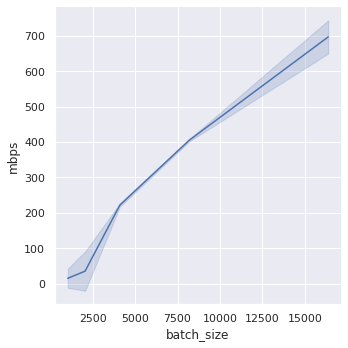

In [72]:
sns.relplot(
    data=interleaved[interleaved["batch_size"] <= 32000], kind="line",
    x="batch_size", y="mbps", errorbar="sd"
)

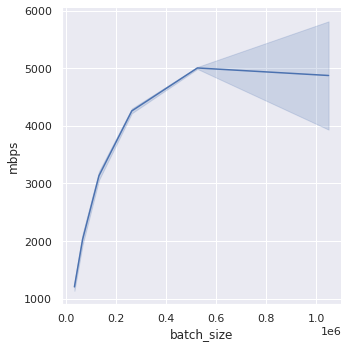

In [71]:
sns.relplot(
    data=interleaved[interleaved["batch_size"] >= 32000], kind="line",
    x="batch_size", y="mbps", errorbar="sd"
)

--> need to identify sustainable throughput (producer produced faster than consumer)